In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/simplyc_model.txt', 
                                                              '../models/data/simplyc_langtjern.dat')

In file ../models/data/simplyc_langtjern.dat line 107 column 8:
The model "SimplyC" does not contain a module named "Priestley-Taylor PET". This data block will be ignored.

Invalidating "Soil DOC production" due to both source or target being 'out' or overridden.
Invalidating "Soil DOC mineralization+resorption" due to both source or target being 'out' or overridden.
Invalidating "Deep soil DOC mineralization" due to both source or target being 'out' or overridden.
Invalidating "dissolved_flux(Soil water DOC, Recharge)" due to both source or target being 'out' or overridden.



In [3]:
_ = ()
app.start_date[_] = '1995-1-1'
app.run()

True

<AxesSubplot:xlabel='Date'>

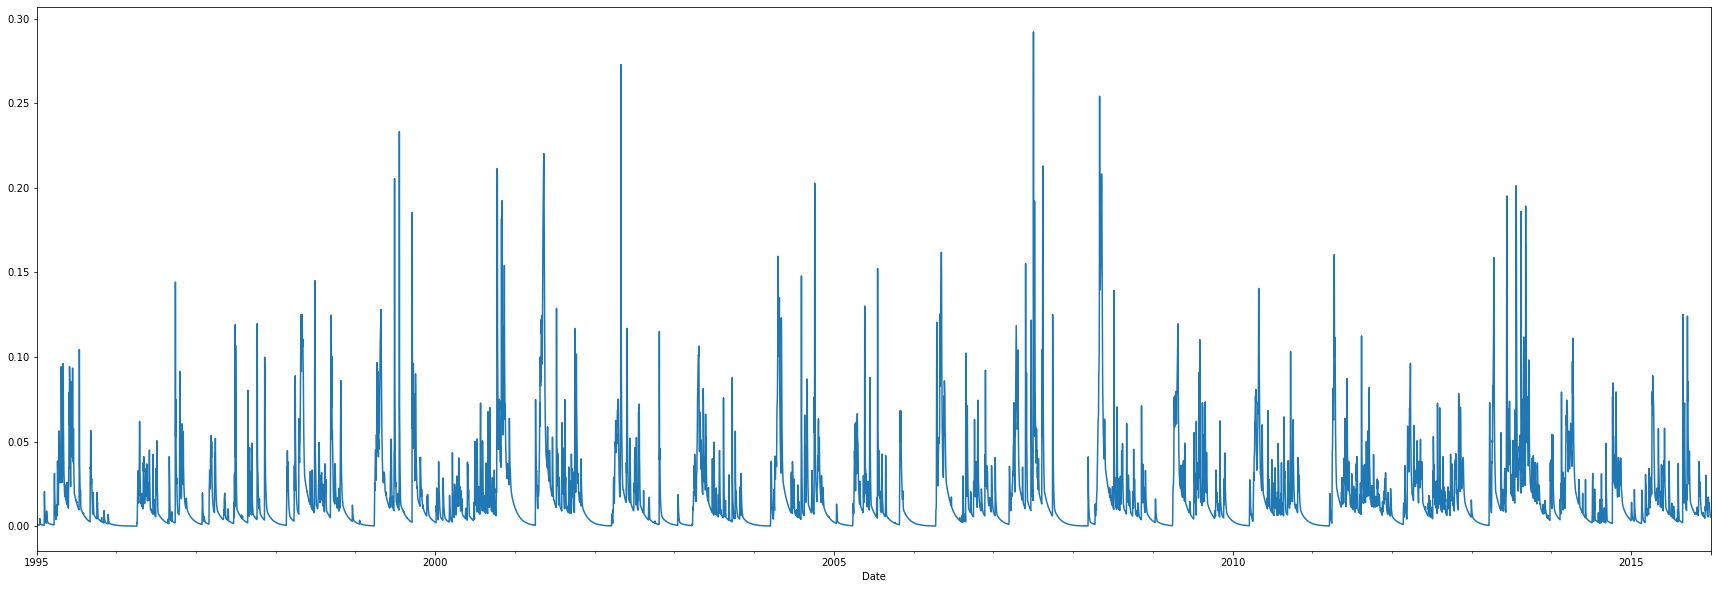

In [4]:
app.river.water.flow['One'].plot(figsize=(30, 10))

In [5]:
sq = app["SimplyQ land"]
sq.bfi[_] = 0.9
sq.tc_g[_] = 100
app.lu_prop["One", "Forest"] = 1
print(sq.bfi.max())

1.0


<AxesSubplot:xlabel='Date'>

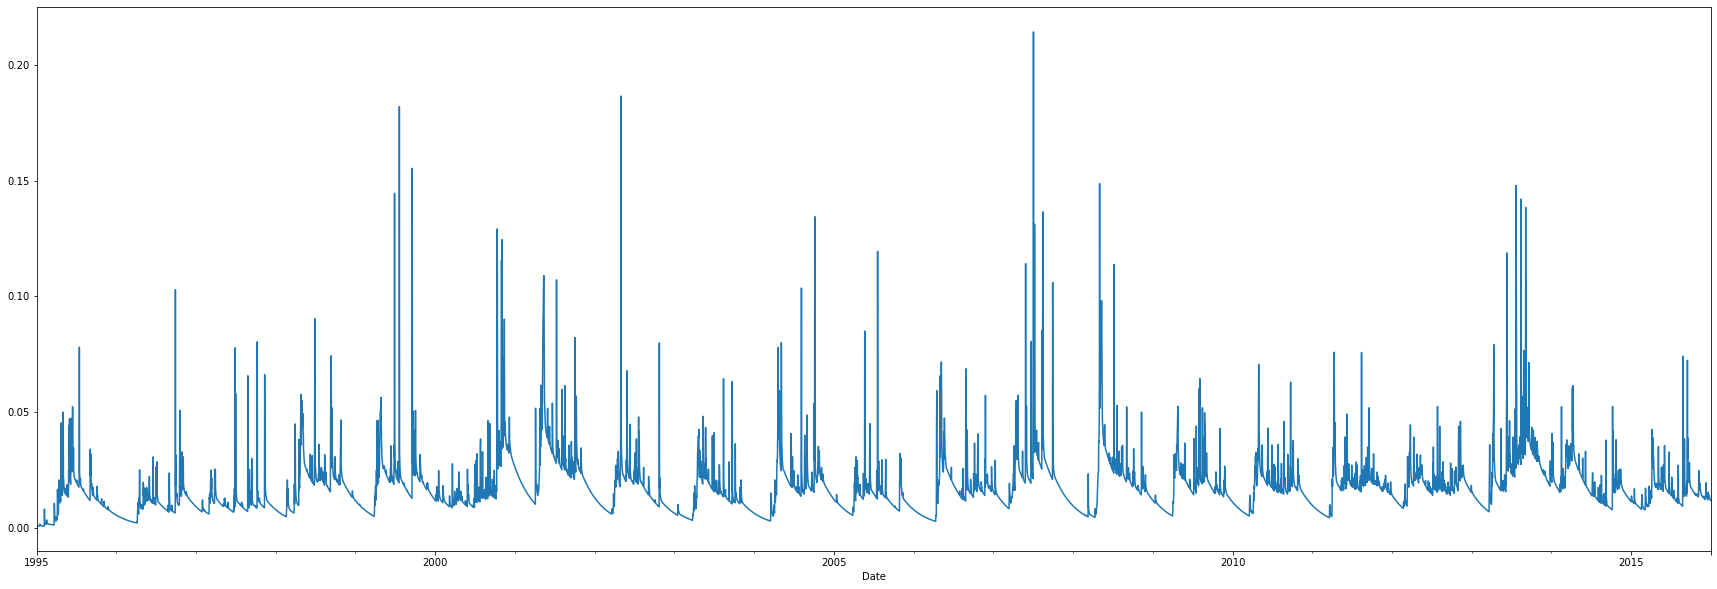

In [6]:
app.run()
app.river.water.flow['One'].plot(figsize=(30, 10))

<AxesSubplot:xlabel='Date'>

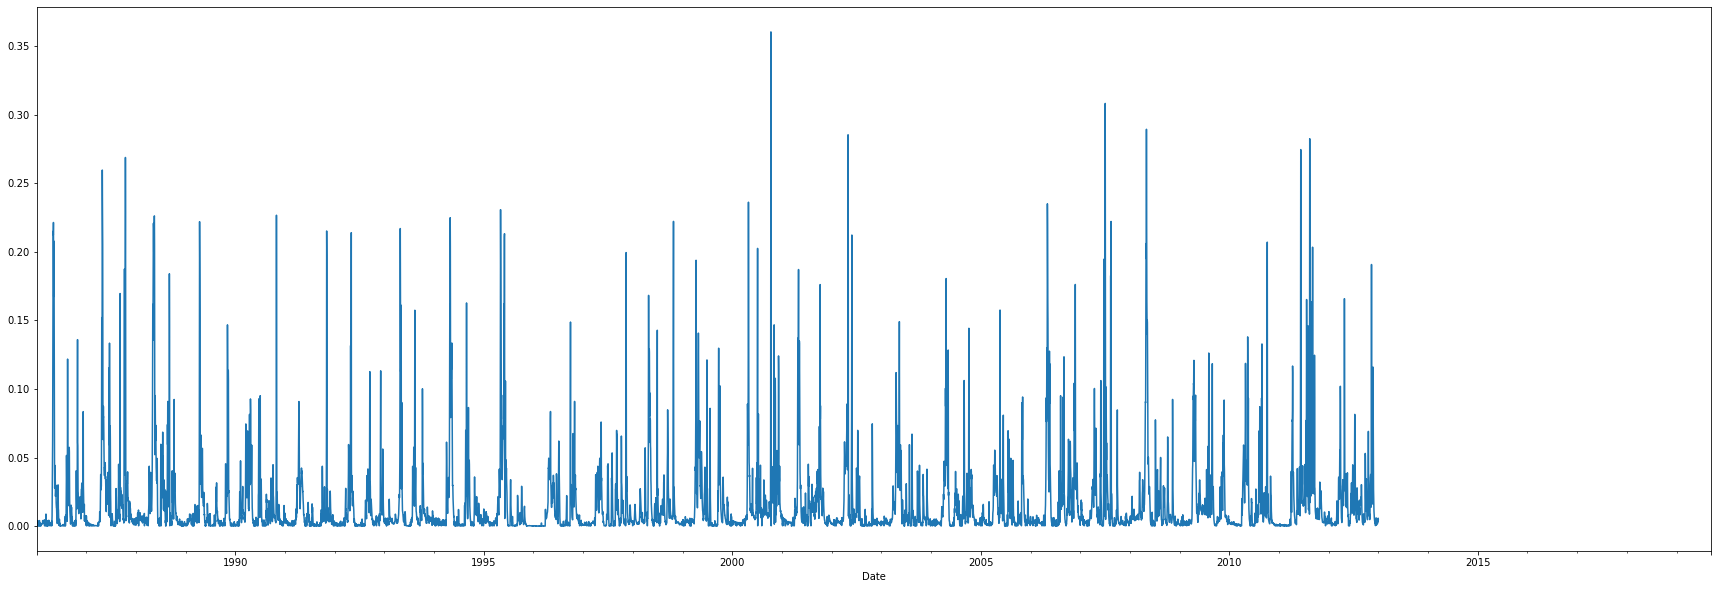

In [7]:
app.var('Observed flow')[_].plot(figsize=(30, 10))

<AxesSubplot:xlabel='Date'>

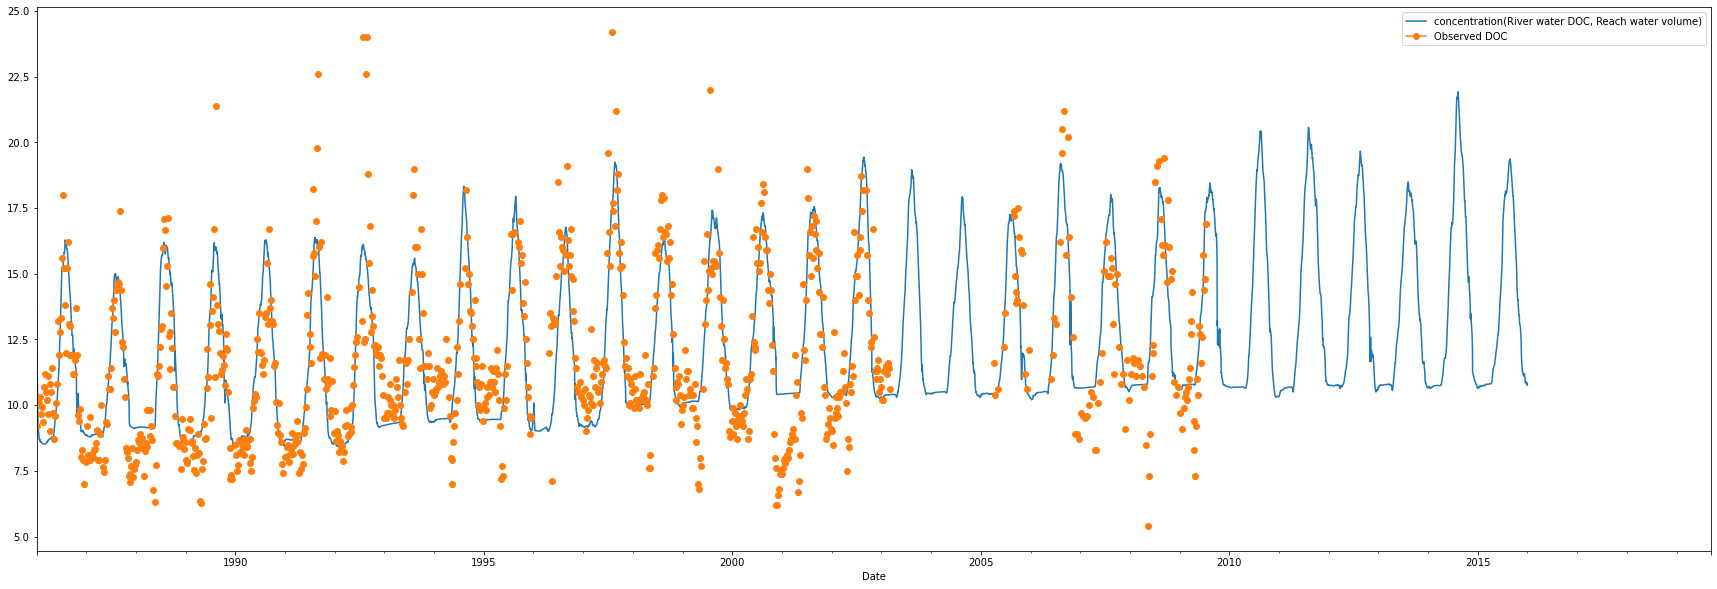

In [8]:
app.start_date[_] = '1986-1-1'
app.run()

fig, ax = plt.subplots(1, figsize=(30, 10))
app.river.water.oc.conc()['One'].plot(ax=ax, legend=True)
app.var('Observed DOC')[_].plot(ax=ax, marker='o', legend=True)

#pd.concat([app.river.water.oc.conc()['One'], app.var('Observed DOC')[_]], axis=1).plot(figsize=(30, 10), marker='o')